In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.rcParams["figure.figsize"] = (18,10)

In [97]:
df=pd.read_csv('dataset/mahsa_amini_dataset.csv',parse_dates=['created_at','user_created_at'], dayfirst=True)

In [4]:
df.head()

,created_at,favorite_count,full_text,hashtags_0,hashtags_1,hashtags_2,hashtags_3,id,reply_count,tweet_type,...,lang,url,user_created_at,user_description,user_favourites_count,user_followers_count,user_id,user_listed_count,user_name,user_verified
0,9/19/2022 19:59,0,NaN,NaN,NaN,NaN,NaN,1.57E+18,NaN,retweet,...,en,https://twitter.com/nginv2000/statuses/1572012...,4/3/2020 9:34,NaN,NaN,71,1.25E+18,NaN,nginv2000,NaN
1,9/19/2022 19:59,0,NaN,NaN,NaN,NaN,NaN,1.57E+18,NaN,retweet,...,fa,https://twitter.com/FeredeIran/statuses/157201...,12/30/2016 17:43,NaN,NaN,144,8.15E+17,NaN,FeredeIran,NaN
2,9/19/2022 19:59,0,NaN,NaN,NaN,NaN,NaN,1.57E+18,NaN,original,...,fa,https://twitter.com/Rezaei868462582/statuses/1...,9/18/2022 16:12,NaN,NaN,4,1.57E+18,NaN,Rezaei868462582,NaN
3,9/19/2022 19:59,0,NaN,NaN,NaN,NaN,NaN,1.57E+18,NaN,reply,...,en,https://twitter.com/currlybita/statuses/157201...,7/10/2022 16:54,NaN,NaN,2,1.55E+18,NaN,currlybita,NaN
4,9/19/2022 19:59,0,NaN,NaN,NaN,NaN,NaN,1.57E+18,NaN,retweet,...,fa,https://twitter.com/sara_littlegirl/statuses/1...,4/20/2013 22:52,NaN,NaN,2279,1368526801,NaN,sara_littlegirl,NaN


## EDA

In [5]:
np.where(df['created_at']=='created_at')

(array([15156, 15279, 16116, 16167], dtype=int64),)

In [6]:
df=df.drop(df.index[[15156, 15279, 16116, 16167]])

In [7]:
df.isnull().sum()

created_at                   0
favorite_count               0
full_text                15106
hashtags_0               15139
hashtags_1               15354
hashtags_2               15682
hashtags_3               16007
id                           0
reply_count              15106
tweet_type                1108
retweeted_user_id         1108
lang                      1108
url                          0
user_created_at              0
user_description         15369
user_favourites_count    15156
user_followers_count         0
user_id                      0
user_listed_count        15106
user_name                   10
user_verified            15099
dtype: int64

In [8]:
df.columns

Index(['created_at', 'favorite_count', 'full_text', 'hashtags_0', 'hashtags_1',
       'hashtags_2', 'hashtags_3', 'id', 'reply_count', 'tweet_type',
       'retweeted_user_id', 'lang', 'url', 'user_created_at',
       'user_description', 'user_favourites_count', 'user_followers_count',
       'user_id', 'user_listed_count', 'user_name', 'user_verified'],
      dtype='object')

In [9]:
df=df[['created_at', 'favorite_count', 'hashtags_0', 'hashtags_1',
       'hashtags_2', 'hashtags_3', 'id', 'reply_count', 'tweet_type',
       'retweeted_user_id', 'lang','user_created_at',
       'user_description', 'user_favourites_count', 'user_followers_count',
       'user_id', 'user_listed_count', 'user_name', 'user_verified']]

In [10]:
df.head()

,created_at,favorite_count,hashtags_0,hashtags_1,hashtags_2,hashtags_3,id,reply_count,tweet_type,retweeted_user_id,lang,user_created_at,user_description,user_favourites_count,user_followers_count,user_id,user_listed_count,user_name,user_verified
0,9/19/2022 19:59,0,NaN,NaN,NaN,NaN,1.57E+18,NaN,retweet,1.420000e+18,en,4/3/2020 9:34,NaN,NaN,71,1.25E+18,NaN,nginv2000,NaN
1,9/19/2022 19:59,0,NaN,NaN,NaN,NaN,1.57E+18,NaN,retweet,1.220000e+18,fa,12/30/2016 17:43,NaN,NaN,144,8.15E+17,NaN,FeredeIran,NaN
2,9/19/2022 19:59,0,NaN,NaN,NaN,NaN,1.57E+18,NaN,original,0.000000e+00,fa,9/18/2022 16:12,NaN,NaN,4,1.57E+18,NaN,Rezaei868462582,NaN
3,9/19/2022 19:59,0,NaN,NaN,NaN,NaN,1.57E+18,NaN,reply,0.000000e+00,en,7/10/2022 16:54,NaN,NaN,2,1.55E+18,NaN,currlybita,NaN
4,9/19/2022 19:59,0,NaN,NaN,NaN,NaN,1.57E+18,NaN,retweet,1.220000e+18,fa,4/20/2013 22:52,NaN,NaN,2279,1368526801,NaN,sara_littlegirl,NaN


In [11]:
df.fillna({'hashtags_0':'Mahsa_Amini', 'hashtags_1': 'Mahsa_Amini','hashtags_2':'Mahsa_Amini','hashtags_3':'Mahsa_Amini'}, inplace=True)

In [12]:
df.fillna({'reply_count':0,'favorite_count':0 ,'user_description': 'unknown','user_favourites_count':0,'user_followers_count':0,'user_listed_count':0}, inplace=True)

In [13]:
df.isnull().sum()

created_at                   0
favorite_count               0
hashtags_0                   0
hashtags_1                   0
hashtags_2                   0
hashtags_3                   0
id                           0
reply_count                  0
tweet_type                1108
retweeted_user_id         1108
lang                      1108
user_created_at              0
user_description             0
user_favourites_count        0
user_followers_count         0
user_id                      0
user_listed_count            0
user_name                   10
user_verified            15099
dtype: int64

## How many of user account is verified

In [15]:
sorted_df_verifide_account=df.sort_values(['user_id','user_verified']).drop_duplicates('user_id',keep='last')

In [16]:
new_verifide_account=sorted_df_verifide_account.dropna(subset=['user_verified'])['user_verified']
new_verifide_account.value_counts(dropna=False)

FALSE    115
TRUE      43
1          5
Name: user_verified, dtype: int64

In [17]:
new_verifide_account=new_verifide_account.replace(['FALSE','TRUE','1'],[0,1,1])
new_verifide_account=new_verifide_account.value_counts()
new_verifide_account

0    115
1     48
Name: user_verified, dtype: int64

<BarContainer object of 2 artists>

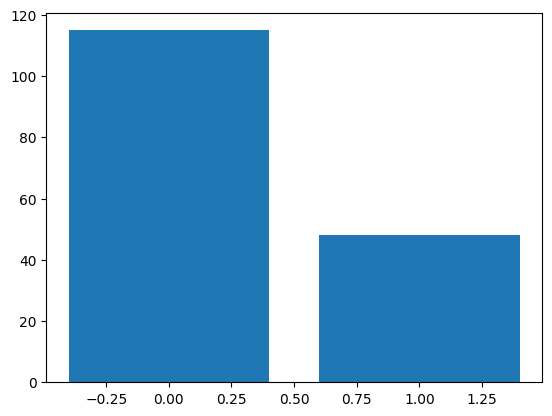

In [18]:
plt.bar(new_verifide_account.index,new_verifide_account.values)

## Find male or female

In [19]:
%pip install names-dataset


[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
from names_dataset import NameDataset, NameWrapper
nd = NameDataset()

In [21]:
print(NameWrapper(nd.search('fatemeh')).describe)

Female, Iran, Islamic Republic of


In [22]:
user_name=df['user_name'].dropna()

In [23]:
def genderIdentifier(name):
    arr=[' Iraq',' Saudi Arabia',' Iran']
    m = 0
    f = 0
    if(isinstance(name, str)):
        
        for i in range(1,len(name)+1):
            for j in range(i+1,len(name)+1):
                 x = NameWrapper(nd.search(name[int(i):int(j)])).describe
                 country=x.split(',')[1]
                 gender=x.split(',')[0]
                 if country in arr:
                    if "Male" in gender:
                        m = m+1
                    if "Female" in gender:
                         f = f+1
        if m>f:
            g = "male"
        elif m<f:
            g = "female"
        else :
            g = "unknown"
        return g 
    else:
        return 'unknown'                

In [24]:
df['gender']=df['user_name'].apply(lambda x: genderIdentifier(x) )

In [25]:
df['gender'].unique()

array(['unknown', 'female', 'male'], dtype=object)

In [26]:
sorted_df=df.sort_values(['user_id','gender']).drop_duplicates('user_id',keep='last')
sorted=sorted_df['gender'].dropna()
sorted=sorted[(sorted=='male')|(sorted=='female')]
gender_user=sorted.value_counts()

<BarContainer object of 2 artists>

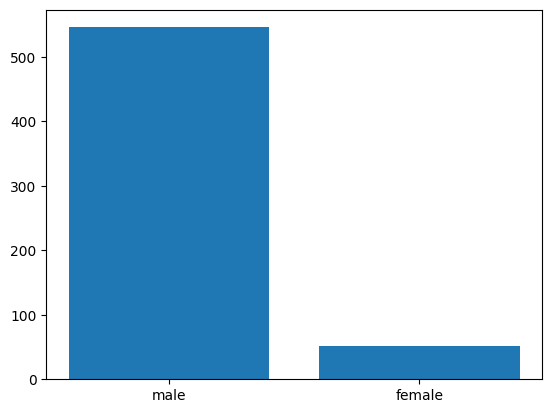

In [27]:
plt.bar(gender_user.index,gender_user.values)

## How many of people join twiter diuring this time

In [28]:
df.columns

Index(['created_at', 'favorite_count', 'hashtags_0', 'hashtags_1',
       'hashtags_2', 'hashtags_3', 'id', 'reply_count', 'tweet_type',
       'retweeted_user_id', 'lang', 'user_created_at', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_id',
       'user_listed_count', 'user_name', 'user_verified', 'gender'],
      dtype='object')

In [29]:
df[['created_at','user_created_at']]

,created_at,user_created_at
0,9/19/2022 19:59,4/3/2020 9:34
1,9/19/2022 19:59,12/30/2016 17:43
2,9/19/2022 19:59,9/18/2022 16:12
3,9/19/2022 19:59,7/10/2022 16:54
4,9/19/2022 19:59,4/20/2013 22:52
...,...,...
16213,2022-09-23T23:59:49.000Z,2020-05-12T22:23:31.000Z
16214,2022-09-23T23:59:45.000Z,2013-02-18T09:32:07.000Z
16215,2022-09-23T23:59:46.000Z,2018-07-27T16:24:15.000Z
16216,2022-09-23T23:59:45.000Z,2020-04-03T19:47:30.000Z


In [30]:
dt.datetime.strptime('2022-09-23T23:59:47.000Z', "%Y-%m-%dT%H:%M:%S.%fZ")

datetime.datetime(2022, 9, 23, 23, 59, 47)

In [31]:
def post_datetime(x):
    indx=np.where(df['created_at']==x)[0][0]
    if (indx>=15106):
      return dt.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ")
    if(indx<15106):
       return dt.datetime.strptime(x, '%m/%d/%Y %H:%M') 
df['created_at']=df['created_at'].apply(lambda x:post_datetime(x))

In [32]:
def user_signup_dtaetime(x):
    indx=np.where(df['user_created_at']==x)[0][0]
    if (indx>=15106):
      return dt.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ")
    if(indx<15106):
       return dt.datetime.strptime(x, '%m/%d/%Y %H:%M') 
df['user_created_at']=df['user_created_at'].apply(lambda x:user_signup_dtaetime(x))

In [33]:
mask=(df['user_created_at']>'2022-07-1') & (df['user_created_at']<'2022-10-1')

In [34]:
df_=df.loc[mask]

In [35]:
percentage_signup=round((df_.shape[0])/(df.shape[0])*100 ,2)
percentage_signup

17.3

#### accourding to the above result 17.3% of people sign up to twiter after increase amount of tweets with Mahsa Amini hashtag 

# Focuse on jurnalist postes

In [36]:
def find_jurnalist(x):
    if (type(x) is str ):
        arr=x.split()
        for i in arr:
            if(i=='Journalist'):
               return 'Journalist' 
    else:
        return x           

df['user_journalist']=df['user_description'].apply(lambda x: find_jurnalist(x))

In [37]:
df['user_journalist'].value_counts()

Journalist    29
Name: user_journalist, dtype: int64

In [39]:
def get_month(x):
    return dt.datetime(x.year, x.month, x.day) 

In [40]:
df['new_created_at']=df['created_at'].apply(get_month)

In [41]:
sorted_bytime_df=df.sort_values(['new_created_at'])

In [42]:
test_date1 = df['created_at'].min()
test_date2 = df['created_at'].max()
N = 4
temp = []
diff = ( test_date2 - test_date1) // N
for idx in range(0, N+1):
    
    temp.append((test_date1 + idx * diff))

res=[]
for sub in temp:
    res.append(sub.strftime("%Y-%m-%d"))  
res     

['2022-09-19', '2022-09-29', '2022-10-08', '2022-10-18', '2022-10-27']

In [43]:
df_for_time={'time':[],
'Journalist':[],
'other':[]
}

In [44]:
for idx, x in enumerate(res):   
    if((idx+1)<len(res)):
        mask=(df['created_at']>res[idx]) & (df['created_at']<res[idx+1])
        df_for_time['time'].append(f'{res[idx]} to {res[idx+1]}')
        dfm=df.loc[mask]
        number_of_journalists=dfm[dfm['user_journalist']=='Journalist'].shape[0]
        number_of_other=dfm[dfm['user_journalist']!='Journalist'].shape[0]
        df_for_time['Journalist'].append(number_of_journalists)
        df_for_time['other'].append(number_of_other)


In [45]:
dfn=pd.DataFrame(data=df_for_time)
dfn

,time,Journalist,other
0,2022-09-19 to 2022-09-29,0,15256
1,2022-09-29 to 2022-10-08,0,51
2,2022-10-08 to 2022-10-18,0,0
3,2022-10-18 to 2022-10-27,21,876


Text(0.5, 1.0, 'Number of journalist vs. other')

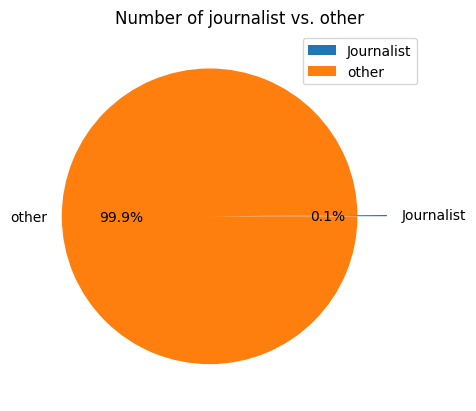

In [46]:
plt.pie([dfn['Journalist'].sum(), dfn['other'].sum()], 
        labels=['Journalist', 'other'],
        explode = [0, 0.2],
        autopct='%1.1f%%')

plt.legend()
plt.title("Number of journalist vs. other")

Text(0, 0.5, 'Count')

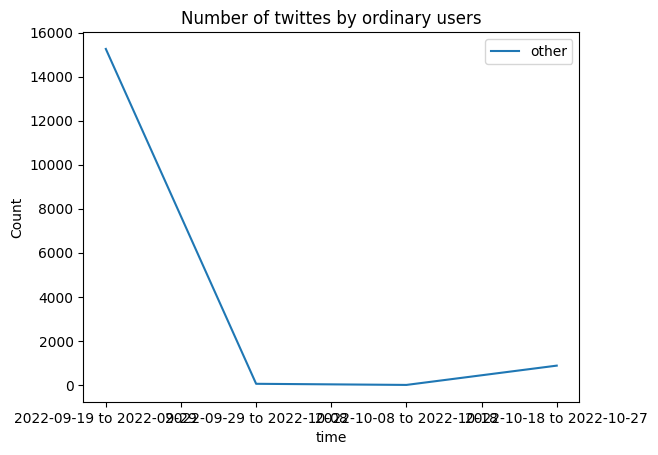

In [47]:
dfn.plot(x="time", y="other", kind="line")
plt.title("Number of twittes by ordinary users")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

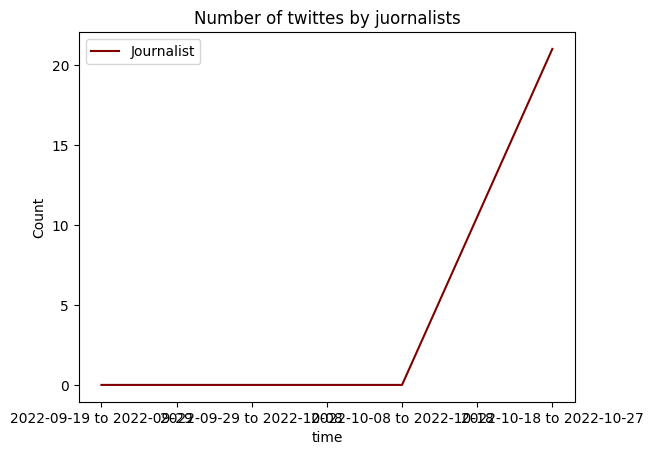

In [48]:
dfn.plot(x="time", y="Journalist", kind="line",color="maroon")
plt.title("Number of twittes by juornalists")
plt.ylabel("Count")

## Compare languege of tweets

In [50]:
lang=df['lang'].dropna()
lang_=lang.value_counts()

Text(0, 0.5, 'Count')

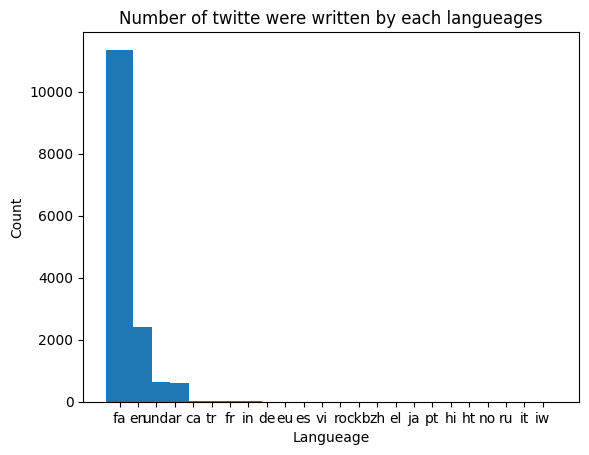

In [51]:
plt.bar(lang_.index,lang_.values,width = 1.5)
plt.title("Number of twitte were written by each langueages")
plt.xlabel("Langueage")
plt.ylabel("Count")

## Coralation between hashtag

In [72]:
df_hashtag=df[['user_id','hashtags_0', 'hashtags_1','hashtags_2', 'hashtags_3']]

In [73]:
df.columns

Index(['created_at', 'favorite_count', 'hashtags_0', 'hashtags_1',
       'hashtags_2', 'hashtags_3', 'id', 'reply_count', 'tweet_type',
       'retweeted_user_id', 'lang', 'user_created_at', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_id',
       'user_listed_count', 'user_name', 'user_verified', 'gender',
       'user_journalist', 'new_created_at'],
      dtype='object')

In [93]:
col=df_hashtag['hashtags_2'].value_counts().head(10).index
col

Index(['Mahsa_Amini', 'MahsaAmini', 'مهسا_امینی', 'OpIran', 'اعتصابات_سراسری',
       'IranRevoIution2022', 'IranRevolution', 'زن_زندگی_آزادی',
       'IranRevolution2022', 'mahsaamini'],
      dtype='object')

In [96]:
#df_hashtag[df_hashtag['hashtags_0']=='OpIran'].pivot_table(index=df_hashtag['user_id'],columns=col,values=df_hashtag['hashtags_2']).count()